# Calculating maturation times for different biological organisms


## Introduction

Here, we're calculating the normalized maturation time for different organisms. These calculations rely heavily on the model presented in G. B. West, J. H. Brown, and B. J. Enquist, ‘A General Model for Ontogenetic Growth’, Nature, 413.6856 (2001), 628–31



In [51]:
import numpy as np

def findMaturationTime(m0, a, M, threshold = 0.95):
    masst = M*threshold
    time = -4*np.power(M,0.25)/a*np.log(-1*(np.power(masst/M, 0.25) - 1) / (1-np.power(m0/M,0.25)))
    return time

def find_b(a,M):
    b = a/np.power(M,0.25)
    return b

ratios = {}

In [52]:
#for animals

#from A general model for ontogenetic growth

animals = { "cow": 
               {
                   "a": 0.276,
                    "M": 442000,
                    "m0": 33333
                   },
           "hen":
               {
                   "a": 0.47,
                   "m0": 43,
                   "M": 2100
               },
           "salmon":
               {
                   "a": 0.026,
                   "m0": 0.01,
                   "M": 2400
               },
           "shrimp":
               {
                   "a": 0.027,
                   "m0": 0.0008,
                   "M": 0.075
               }
}

ratios["animals"] = []

for animal in animals.keys():
    time = findMaturationTime(animals[animal]["m0"],animals[animal]["a"],animals[animal]["M"])
    b = find_b(animals[animal]["a"],animals[animal]["M"])
    #print(animal + ": " + str(time*b))
    ratios["animals"].append(time*b)

print(ratios["animals"])

[14.481906078958799, 15.550521997287674, 17.266647510158123, 15.900852745007136]


In [53]:
#for plants

#from Carbon use efficiency depends on growth respiration, maintenance respiration, and relative growth rate. A case 
#study with lettuce. M. W. VAN IERSEL. Department of Horticulture, The University of Georgia, Athens, GA 30602, USA

ratios["plants"] = np.power(np.asarray([0.2, 0.65]),-1)

print(ratios["plants"])

[5.         1.53846154]


In [54]:
#for microbes

#from Growth, metabwith open('eggs.csv', 'rb') as csvfile:
import csv 

ratios["microbes"] = []

with open('microbes.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        try:
            ratio = float(row[8])/float(row[9]) #dividing b by the growth rate (effectively the inverse of maturation time)
            ratios["microbes"].append(ratio)
        except ValueError:
            continue

print(ratios["microbes"])

[0.044320501967033514, 0.040834619789851104, 0.012636322892286242, 0.004558278628234392, 0.0036259034542773572, 0.09682875264270614, 0.14545454545454548, 0.024312896405919663, 0.09936575052854123, 0.08942917547568711, 0.08942917547568711, 0.021987315010570826, 0.1630021141649049, 0.0023678646934460887, 0.023044397463002114, 0.02177589852008457, 0.020380549682875265, 0.019006342494714588, 0.017272727272727273, 0.014947145877378436, 0.040380549682875265, 0.03213530655391121, 0.03213530655391121, 0.055391120507399576, 0.020338266384778016, 0.0331923890063425, 0.04947145877378436, 0.044820295983086685, 0.05412262156448203, 0.04312896405919662, 0.04101479915433404, 0.03911205073995772, 0.036786469344608885, 0.046723044397463005, 0.030866807610993658, 0.048202959830866816, 0.045243128964059194, 0.04334038054968287, 0.022621564482029597, 0.04143763213530655, 0.03911205073995772, 0.034883720930232565, 0.03340380549682875, 0.03530655391120508, 0.03572938689217759, 0.025581395348837212, 0.036786

In [59]:
#make the chart

ranges = {key: [np.amin(item), np.amax(item)] for key,item in ratios.items()}
print(ranges)



{'animals': [14.481906078958799, 17.266647510158123], 'plants': [1.5384615384615383, 5.0], 'microbes': [0.001993293323546767, 0.6077018553443913]}


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1398: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


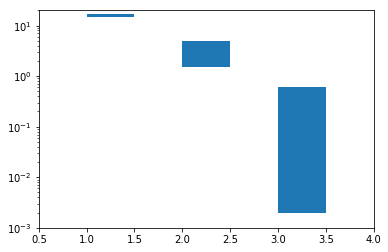

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
x=1
for key,arange in ranges.items():
    ax1.add_patch(
        patches.Rectangle(
            (x, arange[0]),   # (x,y)
            0.5,          # width
            arange[1]-arange[0],          # height
        )
    )
    x=x+1

ax1.set_xlim(0.5, 4)
ax1.set_ylim(0.001, 20)
ax1.set_yscale('log')
plt.savefig('ratio.svg')
plt.show(fig1)
